### Objective:-
Use Machine learning to predict the price of a car based on several characteristics. The objective is to 
build a model to understand the factors that drive the car of the price. This will help your automobile 
company launch their new car in the market effectively by pricing it better.

### Tasks:
- Perform EDA on the data
- Perform data cleanup as required
- Pick the best variable for making a simple linear regression model
- Perform train test split
- Build model using best variable and report the R2
- Make a multiple regression model
o Apply feature selection approaches discussed in the class
- Final model should be interpretable
o What is your understanding of the factors that drive price?

In [1]:
# Importing Requires Libaries
import pandas as pd                          # Data Manipulation
import numpy as np

import matplotlib.pyplot as plt              # Data Visualization
import seaborn as sns

import os, sys, warnings                     # Importing Standard
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split     # MAchine learning Operation
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# Importing Dataset
df = pd.read_csv('C:\\Users\\RUSHABH\\OneDrive\\Desktop\\Rushabh K\\MAchine Learning Chapter\\ML Projects\\PRoj 2\\ML Project 2_ Automobile\\AutoData (1).csv')

In [3]:
df

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.head() 

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 25)

The Dataset contain 205 records with 25 columns

In [6]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Perform EDA on the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

1.All the column have 205 Non Value, So there is No missing Values in the dataset.
2.we have 15 numerical columns and 10 categorical columns

In [8]:
# Calculating some statistical data like percentile, mean and std of the numerical values of the DataFrame
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1.Looking at the mean and the max values i found that the columns curbweight and peakrpm has high mean and max values , so we might have to lookout them while preprocessing.

2. Average price for the car is around 13.2k

# Performing Model on Univariate Analysis

Distribution plots are useful for univariate analysis, its give you so much information about the data you are working on.

In [9]:
sns.set_style('whitegrid'); # setting style

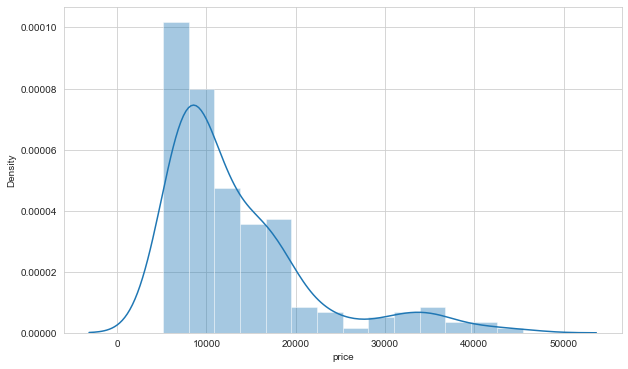

In [10]:
plt.figure(figsize=(10,6))
sns.distplot(df.price);

As you can see data in price column in right skewed. Here the bar indicates the count of the values

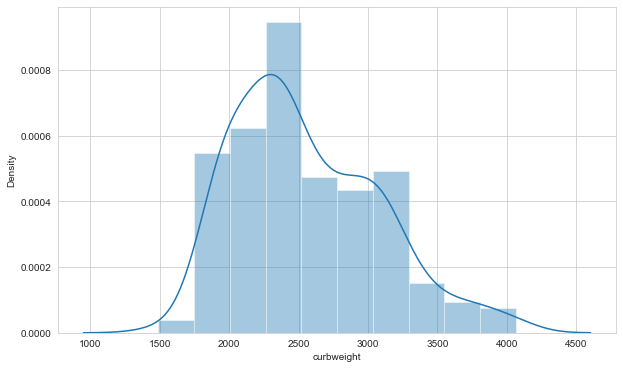

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df.curbweight);


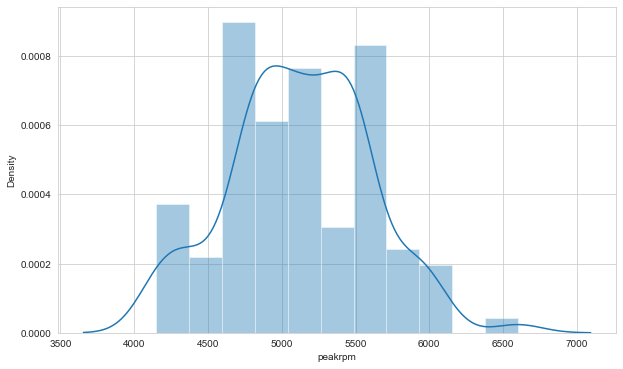

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.peakrpm);

You can totally see the outlier here, because of which distribution is quite tailed at the right hand side

In [13]:
# seperating Numerical and categorical coloumn
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

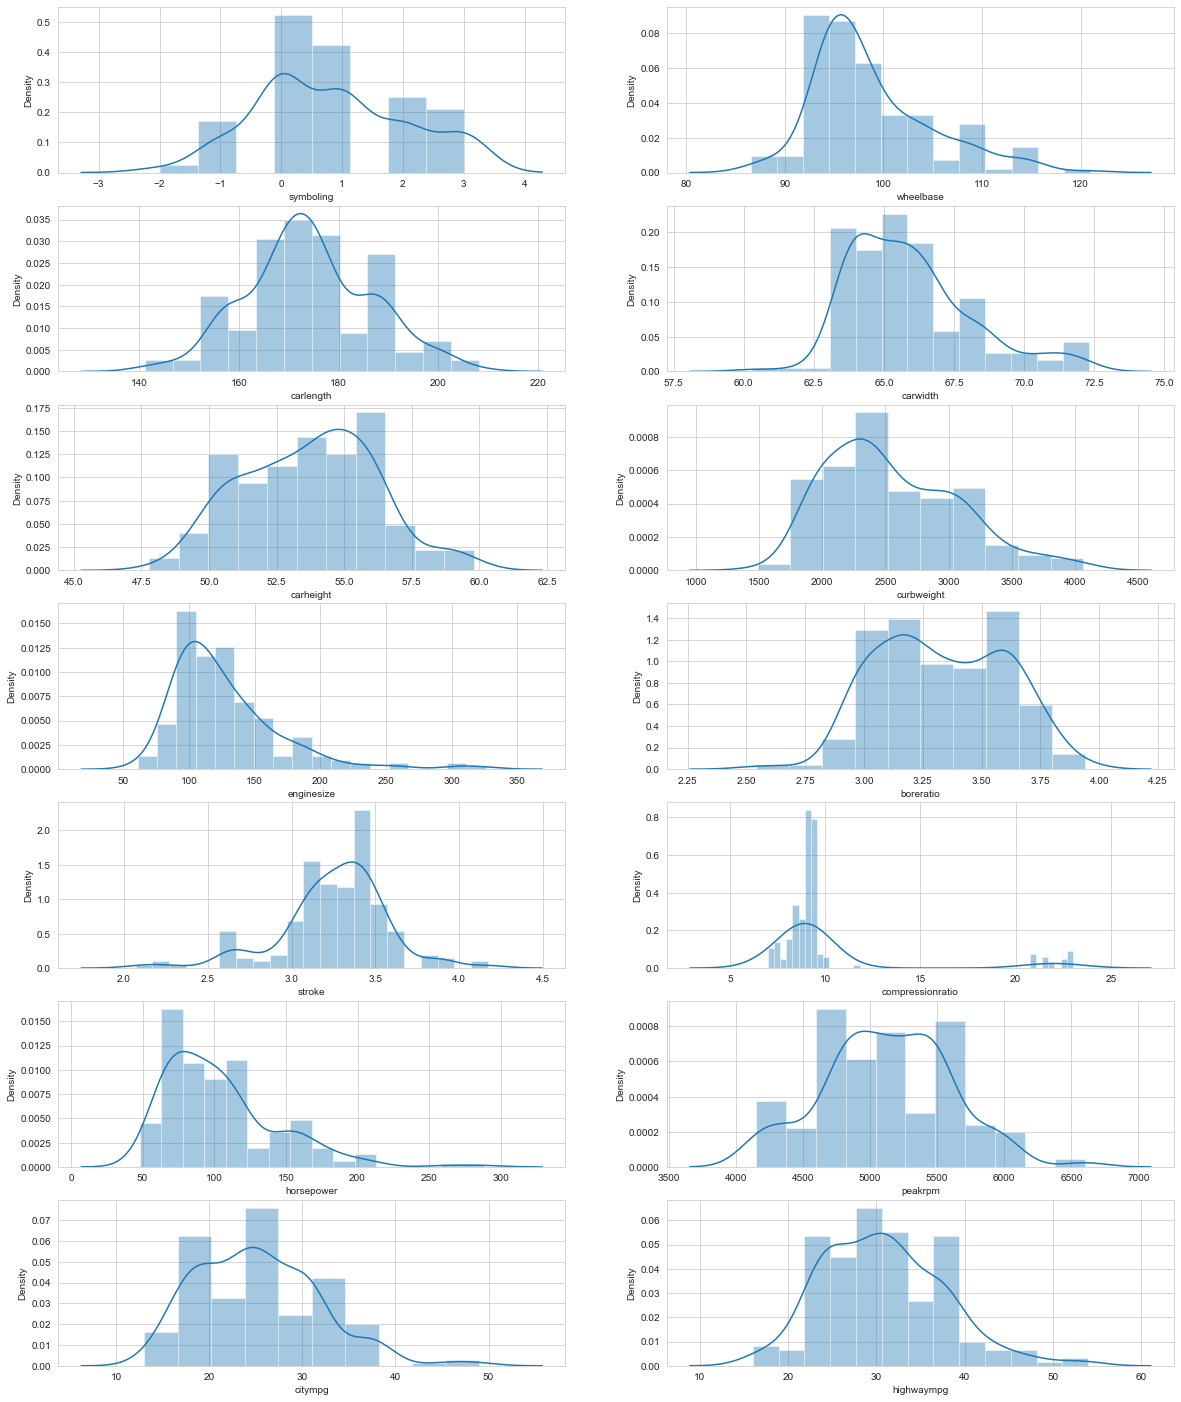

In [14]:
fig,axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 25))

for ax, col in list(zip(axes.flat, numerical_cols)):
    if col != 'price':
        sns.distplot(df[col], ax=ax)

Wheelbase and carlength are close to the gausssian distribution. In compression ratrion It an be clearly seen that there are some outliers which diststrubed overall distribution.

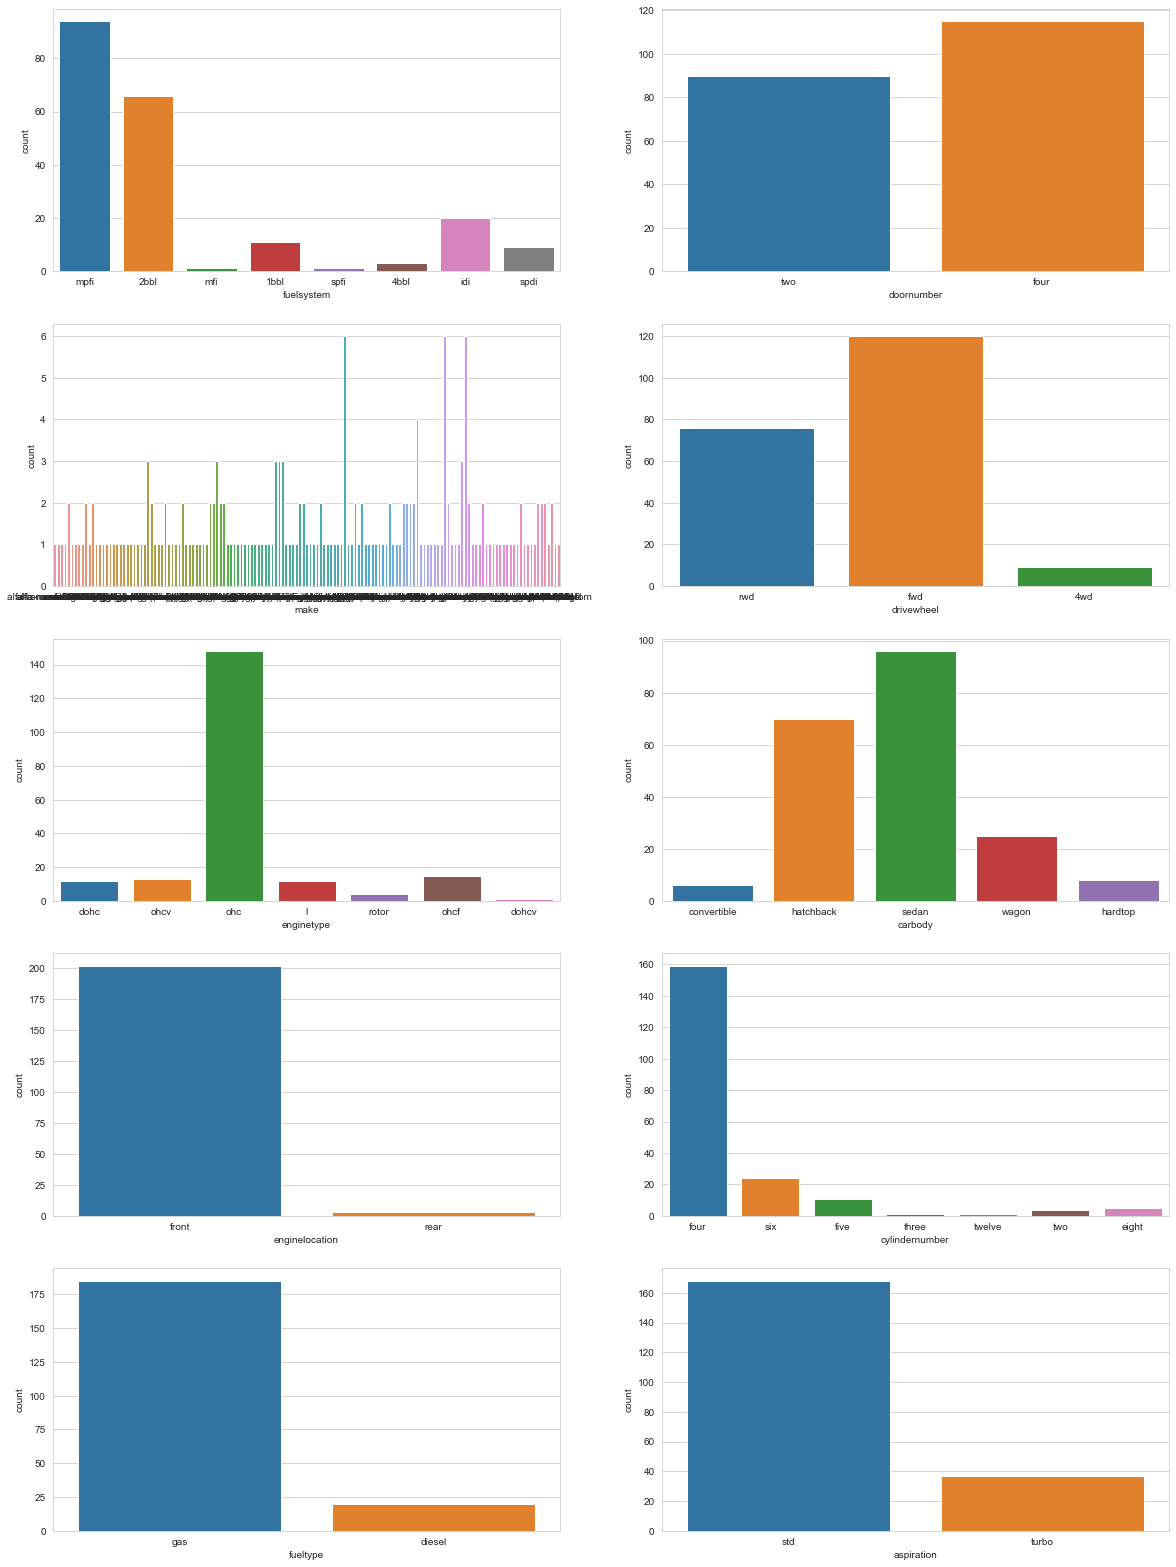

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list(zip(axes.flat, categorical_cols)):
    sns.countplot(df[col], ax=ax)

In [16]:
print(df.enginelocation.value_counts())
print(df[df.enginelocation == 'front'].price.median())
print(df[df.enginelocation == 'rear'].price.median())

front    202
rear       3
Name: enginelocation, dtype: int64
10221.5
34028.0


It shows the rear engine type vehicle value is very High.

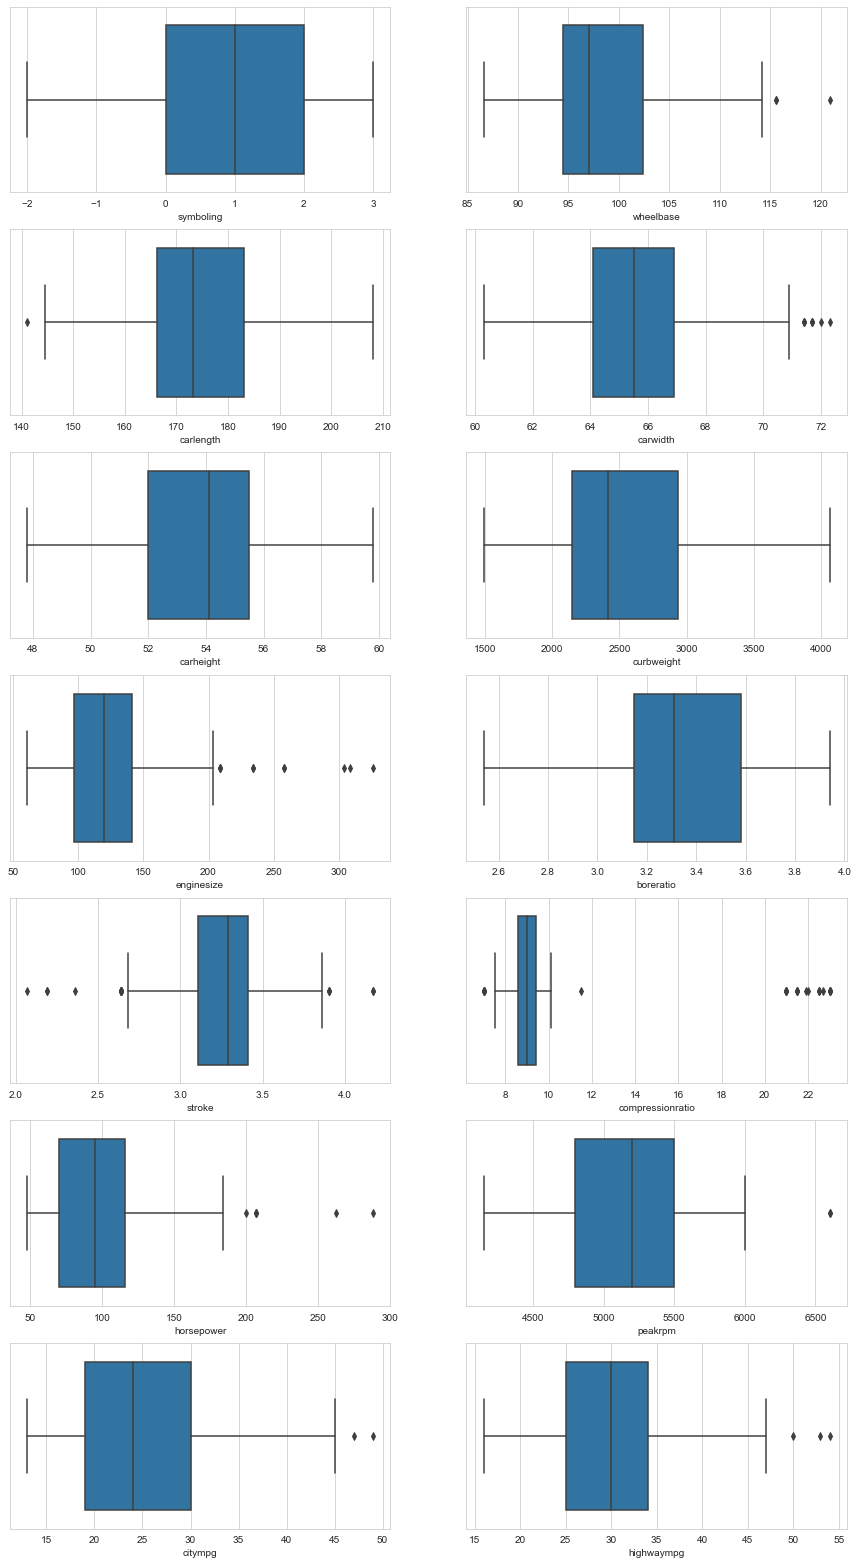

In [17]:
fig, axes = plt.subplots(nrows=7 ,ncols=2, figsize=(15, 28))

for ax, col in list (zip(axes.flat, numerical_cols)):
    if col != 'price':
        sns.boxplot(col, data=df, ax=ax)

There are few Outliers

# Bi- Variate Analysis

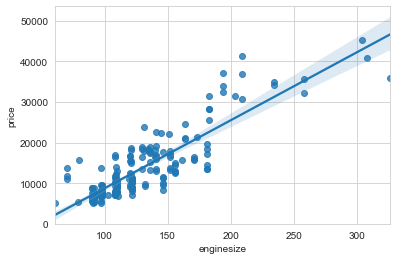

In [18]:
# Engine size as potential predictor variable of price 
sns.regplot(x="enginesize", y="price", data=df)
plt.ylim(0,);

### Positive Linear Relationship:
As the highway mpg goes up, the price goes down: this indicates an inverse/ negative relationship between the two variables.
Highway mpg could potentially be a predictor of price. As the engine-size goes up, the price, this indicates as positve direction corelation between 
these two variables.
Engine size sees like a preety good predictor of price, since the regression line is almost perfectly diagonal goal.


(0.0, 48150.83546488324)

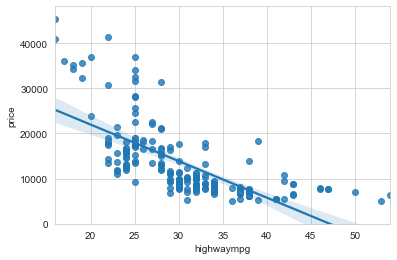

In [19]:
# Highway mpg as a potential predictor variable of price 
sns.regplot(x='highwaympg', y='price', data=df)
plt.ylim(0,)

Negative linear relationship:
    As the highway-mpg goes up, the price goes down: this indicates an inverse/ negative relation ship between two variables 
    Highway mpg could potentially a predictor of price 
    

<AxesSubplot:xlabel='peakrpm', ylabel='price'>

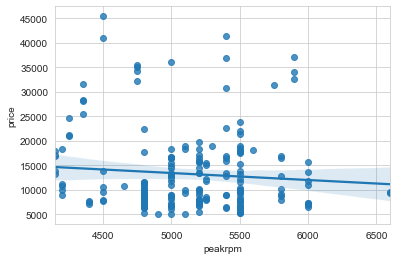

In [20]:
# peak as rpm as a predictor variable price 
sns.regplot(x="peakrpm", y="price", data=df)

### Weak Linear Relation ship:
    Peak rpm does not seem like a good predictor of price at all, since the regression line is close to horizontal. Also, the data points are very
        Scattered and far from the fitted line, showing that there is a lot of variability and so it is not a reliable variable.

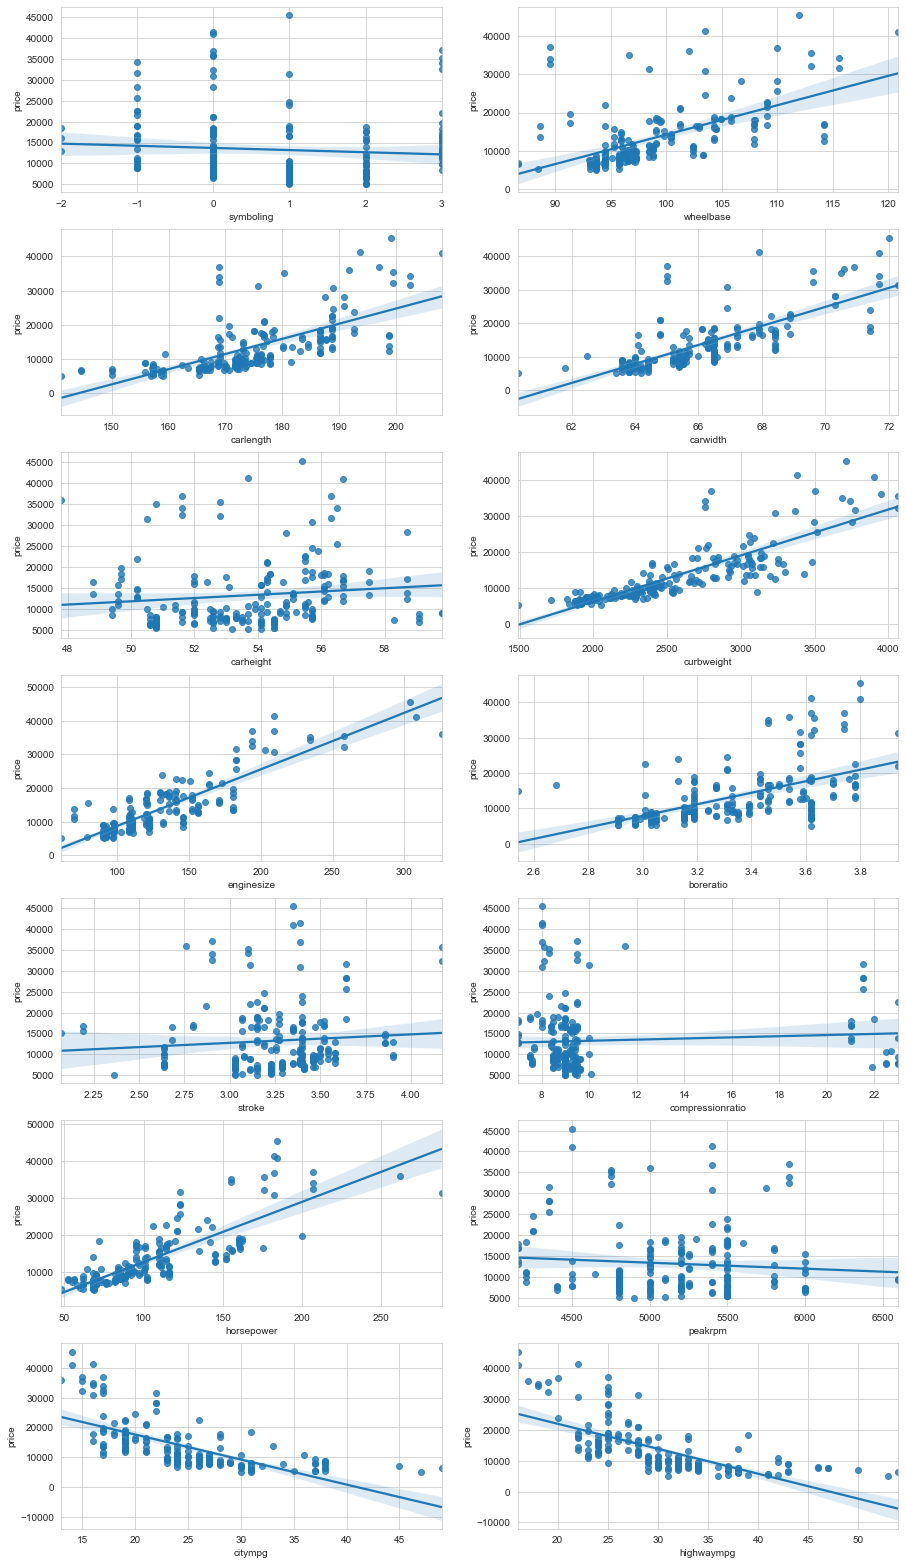

In [21]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 28))
for ax, col in list(zip(axes.flat, numerical_cols)):
        sns.regplot(col, 'price', data=df, ax=ax)

The feature swith straight line shows weak co relation, which means that they wont do any good for our model.

What is about categorical columns?

<AxesSubplot:xlabel='carbody', ylabel='price'>

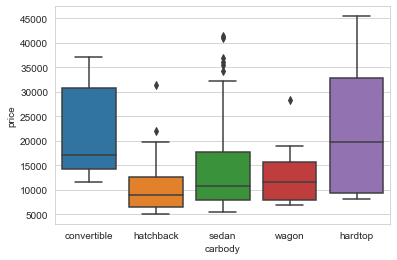

In [22]:
sns.boxplot(x="carbody", y="price", data=df)

We see the distribution of price between the different body-style categories overlap too much, and so body-wouls not be a good price predictor

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

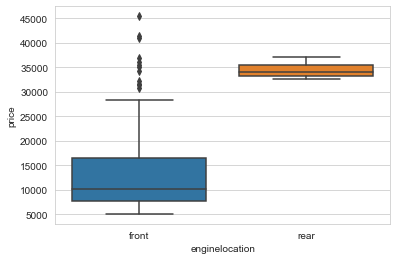

In [23]:
sns.boxplot(x="enginelocation", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories,front and rear, are distinct enough to take engine- location as a potential prediction of price.

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

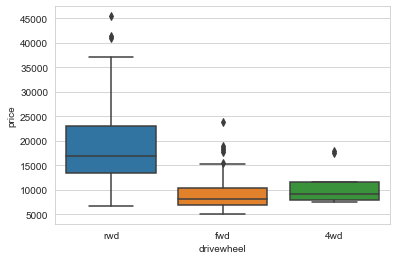

In [24]:
sns.boxplot(x="drivewheel", y="price", data=df)

Here we see that the distribution of price between the different Drive - Wheels categories differs and drive wheels could potentially be a predictor of price.

Lets take a look at the all column

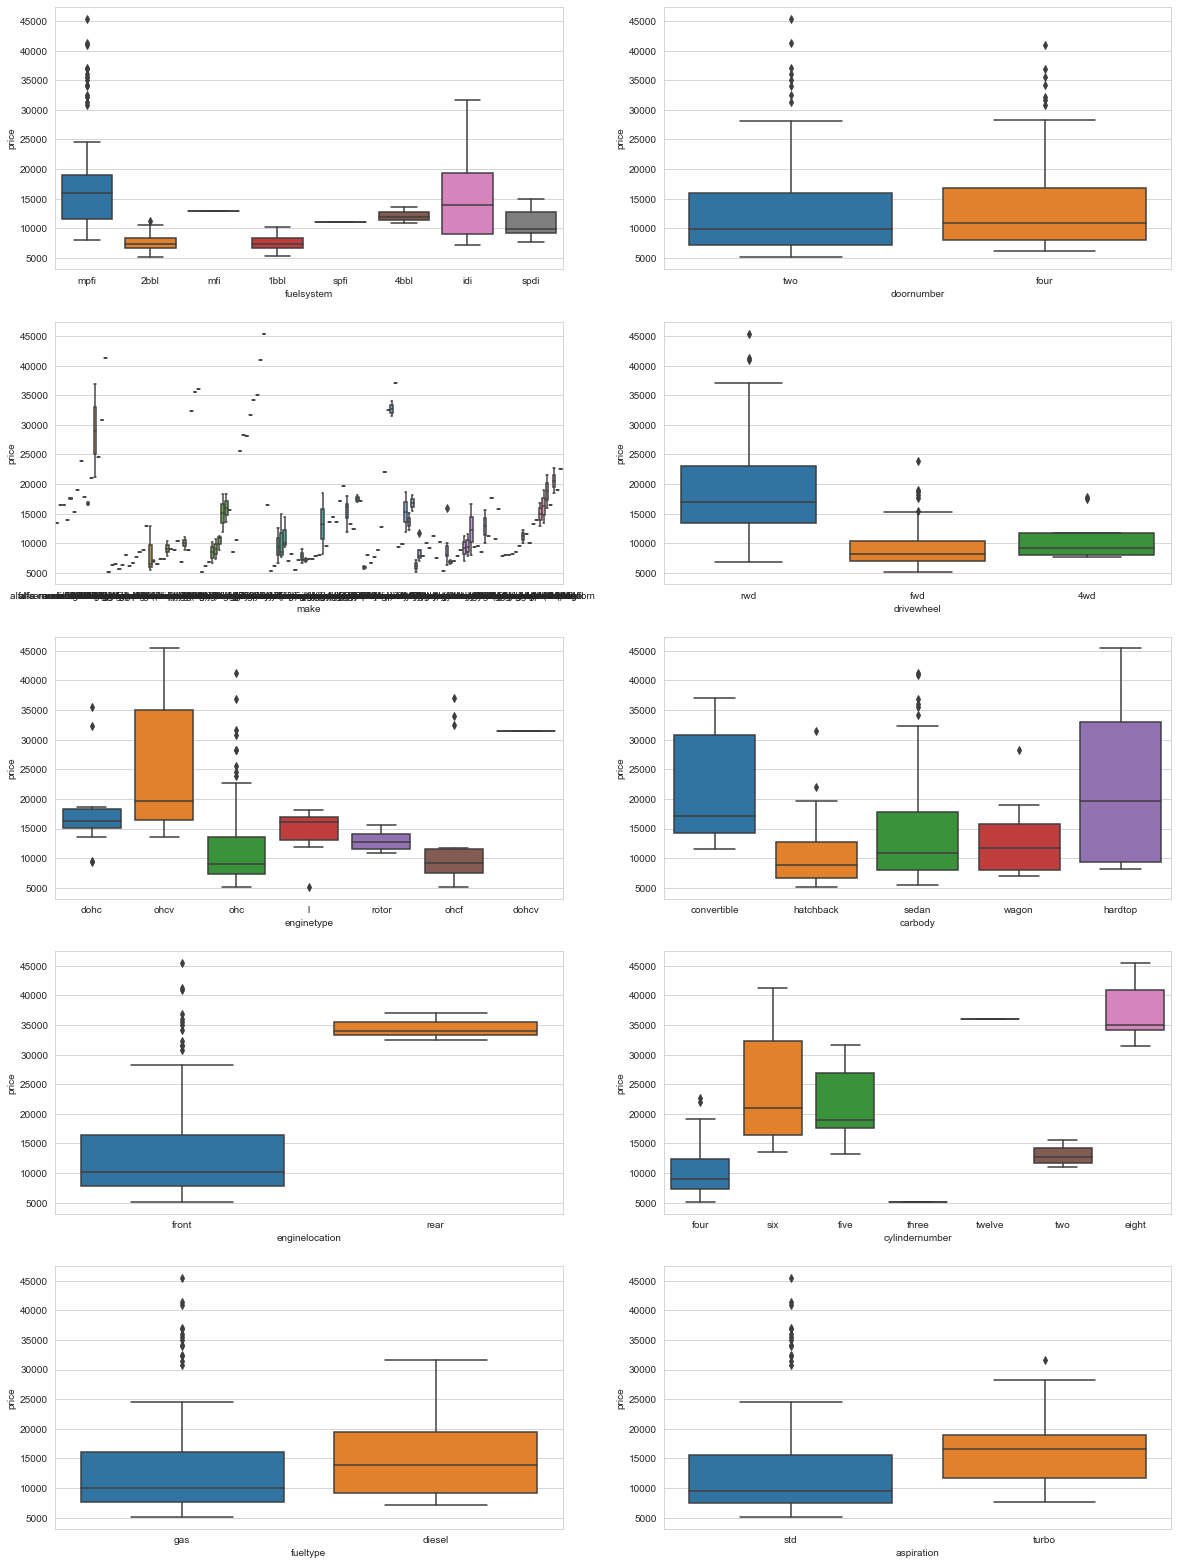

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 28))

for ax, col in list (zip(axes.flat, categorical_cols)):
    sns.boxplot(x=df[col] , y='price', data=df, ax=ax)

#Import Categorical Features:
enginelocation, carbody, fueltype, cylindernumber, Drivewheel

# Data Cleaning

In [26]:
df_cleaned = df.copy(deep=True)

In [27]:
df_cleaned.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [28]:
df_cleaned.drop(['make'], axis=1, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['compressionratio']>12].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['peakrpm']>6000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['citympg']>45].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['highwaympg']>45].index, inplace=True)

In [29]:
df_cleaned.shape

(180, 24)

# Pearson Co-relation

Pearson's Correlation Coefficient helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. ... -1 means that there is a negative correlation.

In [30]:
from scipy import stats

correlation_table = pd.DataFrame()
correlation_table['Features'] = numerical_cols

coeffs = []
p_vs = []
for col in numerical_cols:
    coeff, p = stats.pearsonr(df_cleaned[col], df_cleaned['price'])
    coeffs.append(coeff)
    p_vs.append(p)
    
correlation_table['Pearson_Correlation'] = coeffs
correlation_table['P_value'] = p_vs

In [31]:
correlation_table

,Features,Pearson_Correlation,P_value
0,symboling,-0.009051,9.040219e-01
1,wheelbase,0.546229,2.173024e-15
2,carlength,0.672039,5.283530e-25
3,carwidth,0.742451,8.577412e-33
4,carheight,0.064518,3.895340e-01
5,curbweight,0.833800,8.482601e-48
6,enginesize,0.872371,3.213712e-57
7,boreratio,0.546581,2.068427e-15
8,stroke,0.025504,7.339778e-01
9,compressionratio,-0.163094,2.870196e-02


In [32]:
correlation_table[correlation_table['Pearson_Correlation'] > 0.5] # Columns which have strong positive relationship

,Features,Pearson_Correlation,P_value
1,wheelbase,0.546229,2.173024e-15
2,carlength,0.672039,5.283530e-25
3,carwidth,0.742451,8.577412e-33
5,curbweight,0.833800,8.482601e-48
6,enginesize,0.872371,3.213712e-57
7,boreratio,0.546581,2.068427e-15
10,horsepower,0.839888,4.084386e-49
14,price,1.000000,0.000000e+00


In [33]:
correlation_table[correlation_table['Pearson_Correlation'] < -0.5] # Columns which have strong negative relationship

,Features,Pearson_Correlation,P_value
12,citympg,-0.758091,7.051888e-35
13,highwaympg,-0.760739,3.017076e-35


### Important NUmerical Features
wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg

# DAta Preparation

In [34]:
# These are the final features 
categorical_cols_new = {'enginelocation', 'carbody', 'fueltype','cylindernumber', 'drivewheel'}
numerical_cols_new = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
                     'boreratio', 'horsepower', 'citympg', 'highwaympg']

In [35]:
df_final = df_cleaned[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 
                       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'enginelocation',
                      'carbody','fueltype', 'cylindernumber', 'drivewheel', 'price']]

In [36]:
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,enginelocation,carbody,fueltype,cylindernumber,drivewheel,price
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,front,convertible,gas,four,rwd,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,front,hatchback,gas,six,rwd,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,front,sedan,gas,four,fwd,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,front,sedan,gas,five,4wd,17450.0


# One Hot Encoding

In [37]:
df_final = pd.get_dummies(df_final, drop_first=True)
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,1,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,1,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,1,0,1,0,0,0,0,0,0


# Min-Max Scaling

In [38]:
from sklearn.preprocessing import MinMaxScalar
sc = MinMaxScalar()
df_final[numerical_cols_new] = sc.fit_transform(df_final[numerical_cols_new])

ImportError: cannot import name 'MinMaxScalar' from 'sklearn.preprocessing' (C:\Users\RUSHABH\anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [39]:
df_final.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,carbody_hatchback,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,1,0,0,0,0,1
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,1,0,0,0,0,1
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,1,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,1,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,1,0,1,0,0,0,0,0,0


# Univariate Linerar Regression 

In [43]:
X = df[['enginesize']]
y = df[['price']]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [46]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7072521513680088

So as you can see by using only one variable 'Engine Size' We got R2 value of 0.70

# Multiple Linear Regression 

In [48]:
y = df_final.pop('price')
X = df_final # all Columns


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [50]:
X_train.shape, X_test.shape

((144, 21), (36, 21))

In [51]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [52]:
clf.fit(X_train,y_train)

LinearRegression()

In [53]:
preds = clf.predict(X_test)

In [54]:
clf.score(X_test,y_test) # R2 Score

0.7993538501984068

By Using all the selected features we have R2 value and 0.79 Which really Good